Simulating g=2: 100%|██████████| 1000/1000 [00:00<00:00, 8086.82it/s]


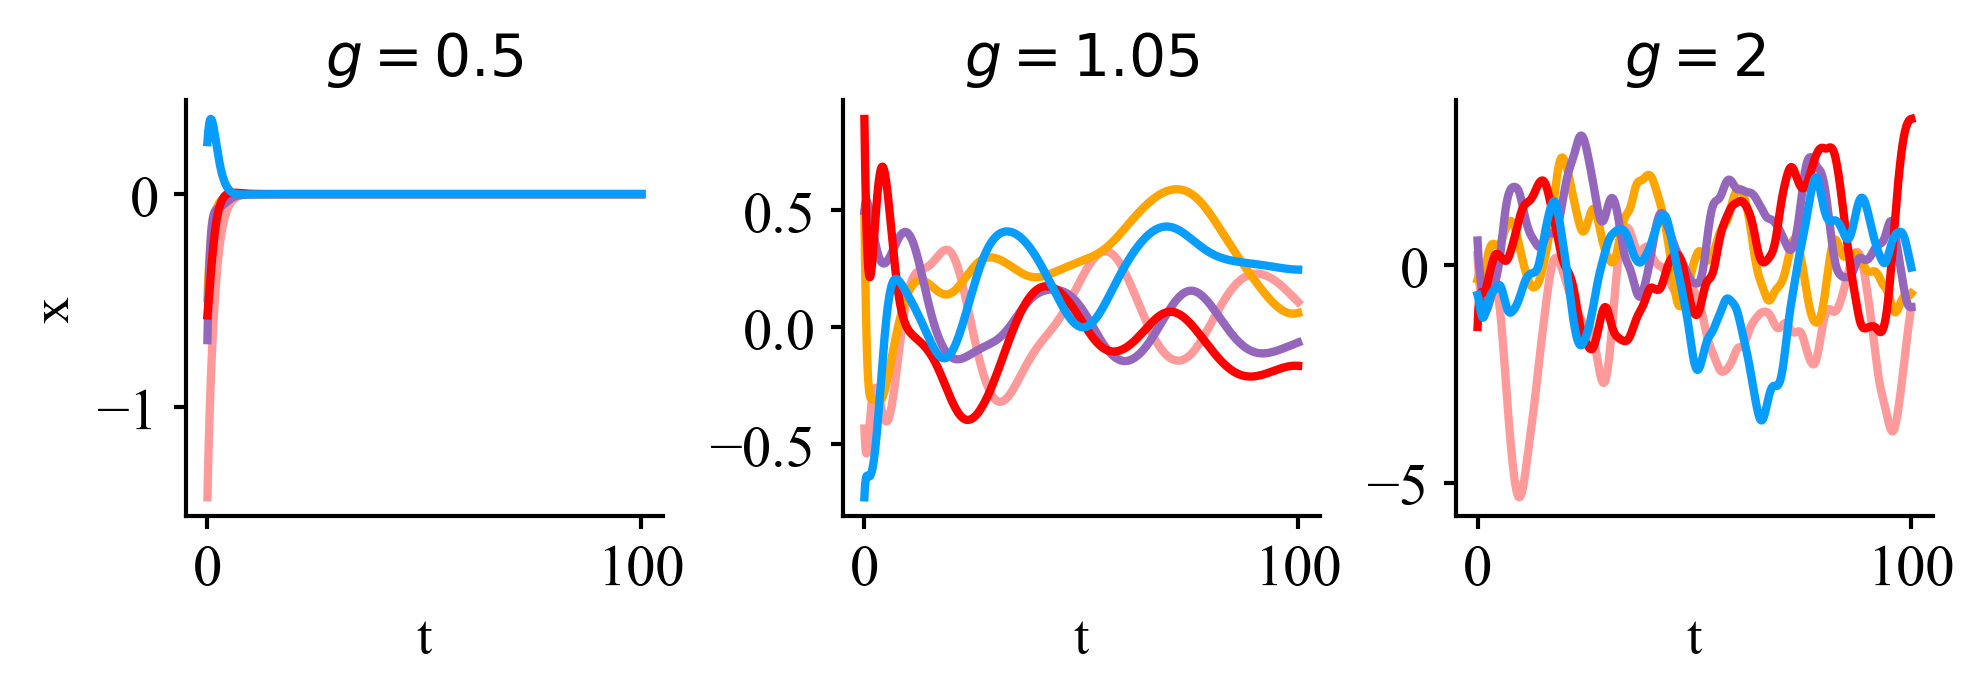

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
device = 'cuda' if torch.cuda.is_available() else 'cpu'

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1.0

g_list = [0.5, 1.05, 2]
Ns = 5000
step_t = 1000
delta_t = 0.1
time = np.arange(step_t + 1) * delta_t
X_Sim = []

# =====  RNN Dynamical Simulation =====
for g in g_list:
    X = torch.zeros((Ns, step_t + 1), device=device)
    X[:, 0] = torch.randn(Ns, device=device)
    J = torch.randn((Ns, Ns), device=device) * (g / np.sqrt(Ns))
    for t in tqdm(range(step_t), desc=f"Simulating g={g}"):
        phi = torch.tanh(X[:, t])
        X[:, t + 1] = (1 - delta_t) * X[:, t] + delta_t * torch.matmul(J, phi)
    selected_neurons = torch.randperm(Ns, device=device)[:5]
    X_Sim.append(X[selected_neurons].cpu().numpy())

fig, axes = plt.subplots(1, 3, figsize=(6.5, 2.2), dpi=300, constrained_layout=True)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
colors = ['#FF9A9B','orange','tab:purple', 'red','#069DFF']
for idx, g in enumerate(g_list):
    ax = axes[idx]
    for i in range(5):
        ax.plot(time, X_Sim[idx][i], color=colors[i], linewidth=2)
    ax.set_title(f"$g={g}$", fontsize=14)
    ax.set_xlabel("t", fontsize=13)
    if idx == 0:
        ax.set_ylabel("x", fontsize=13)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(width=1.0, length=3)

plt.savefig("rnn_random_trajectories.pdf", bbox_inches='tight')
plt.show()